In [32]:
import pandas as pd

In [33]:
energy_consumption = pd.read_table("arm_energy.txt", delim_whitespace=True, header=0, na_values=-1)
energy_consumption.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Client gRPC,Client RPC,Client Rest,Server gRPC,Server RPC,Server Rest
0,0.0,298.95,114.10,0.00,370.20,198.55
1,21.2,15.70,16.10,25.85,17.15,17.20
2,190.0,60.45,66.90,182.15,427.60,76.50
3,2.0,53.90,51.30,2.30,53.50,51.35
4,845.3,39.85,405.35,585.35,45.85,589.65


In [34]:
energy_consumption.describe()

,Client gRPC,Client RPC,Client Rest,Server gRPC,Server RPC,Server Rest
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,160.528571,96.285714,291.600000,123.635714,160.992857,456.200000
std,309.004308,94.864437,427.103839,212.943720,166.563885,755.372075
min,0.000000,15.700000,16.100000,0.000000,17.150000,17.200000
25%,11.600000,46.875000,59.100000,14.075000,49.675000,63.925000
50%,26.400000,60.450000,114.100000,26.300000,98.150000,147.650000
75%,114.400000,102.575000,289.125000,112.825000,242.350000,394.100000
max,845.300000,298.950000,1214.550000,585.350000,427.600000,2112.500000


In [35]:
energy_consumption.quantile([0.05, 0.95])

,Client gRPC,Client RPC,Client Rest,Server gRPC,Server RPC,Server Rest
0.05,0.60,22.945,26.66,0.69,25.76,27.445
0.95,648.71,241.980,971.79,464.39,410.38,1655.645


In [36]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, h, m-h, m+h

In [37]:
energy_consumption.apply(lambda x: mean_confidence_interval(x.dropna()), axis=0)

Client gRPC    (160.52857142857144, 285.7813202184373, -125.2...
Client RPC     (96.28571428571429, 87.73497124521407, 8.55074...
Client Rest    (291.59999999999997, 395.00516907762216, -103....
Server gRPC    (123.63571428571429, 196.94009433487483, -73.3...
Server RPC     (160.9928571428572, 154.04590091412953, 6.9469...
Server Rest    (456.2, 698.6026512758883, -242.40265127588833...
dtype: object

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
melted_df = energy_consumption.melt(var_name ='Protocols', value_name ='Energy consumption (in Joules)')
melted_df.head()

,Protocols,Energy consumption (in Joules)
0,Client gRPC,0.0
1,Client gRPC,21.2
2,Client gRPC,190.0
3,Client gRPC,2.0
4,Client gRPC,845.3


In [40]:
melted_df.rename({1: 'protocols'}, axis='columns', inplace=True)
melted_df.head()

,Protocols,Energy consumption (in Joules)
0,Client gRPC,0.0
1,Client gRPC,21.2
2,Client gRPC,190.0
3,Client gRPC,2.0
4,Client gRPC,845.3


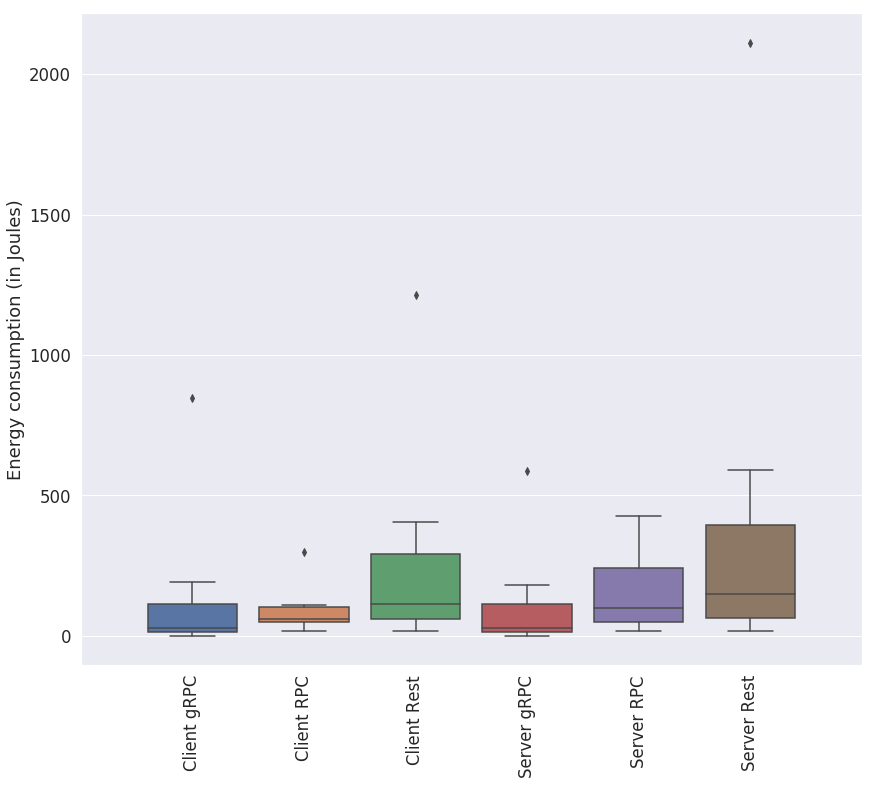

In [41]:
fig, ax = plt.subplots()

sns.set(font_scale=1.5)
fig.set_size_inches(14, 12)
g = sns.boxplot(x="Protocols", y="Energy consumption (in Joules)", data=melted_df, showfliers=True)
ticklabels = g.get_xticklabels()
x_lim = g.get_xlim()
g.set_xlim(x_lim[0] - 0.5, x_lim[1] + 0.5)
_ = g.set_xticklabels(ticklabels, rotation=90)
ax.set_xlabel('')
fig.savefig('arm_platforms_energy.pdf', bbox_inches='tight')